In [0]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy import misc
import cv2

In [0]:
def cross_correlation_2d(image, kernel):
    x, y = kernel.shape
    a, b = image.shape[0], image.shape[1]
    out = np.zeros(image.shape)
    flat_kernel = []
    for row in kernel:
        for i in row:
            flat_kernel.append(i)
    
    channels = image.shape[2] if image.ndim == 3 else 1
    padding_size = (a+x-1,b+y-1,channels)
    padding = np.zeros(padding_size, dtype=image.dtype)

    coords = [[x//2,x//2+a],[y//2,y//2+b]]
    padding[coords[0][0]:coords[0][1], coords[1][0]:coords[1][1]] = image[:, :, np.newaxis] if channels == 1 else image

    for i in range(a):
        for j in range(b):
           out[i, j] = flat_kernel @ padding[i:i+x, j:j+y].reshape((x*y, channels))

    return out

In [0]:
def convolve_2d(image, kernel):
    kernel = kernel[:,::-1]
    kernel = kernel[::-1]
    return cross_correlation_2d(image, kernel)

In [0]:
def gaussian_blur_kernel_2d(size,sigma):
  kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp((-1*((x-(size[0]-1)/2)**2+(y-(size[1]-1)/2)**2))/(2*sigma**2)), (size[0], size[1]))
  kernel /= np.sum(kernel)
  return kernel

In [0]:
def low_pass(size, image, sigma):
    return convolve_2d(image, gaussian_blur_kernel_2d(size,sigma))

In [0]:
def high_pass(size, image, sigma):
    return image - low_pass(size, image, sigma)

In [0]:
image1 = cv2.imread("einstein.bmp")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread("marilyn.bmp")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [0]:
def create_hybrid_image(image1, image2, size, sigma):
    image1 = cv2.resize(image1,(200,200))
    image2 = cv2.resize(image2,(200,200))
    image1 = image1.astype(np.float32) / 255.0
    image2 = image2.astype(np.float32) / 255.0
    out1 = 1.4*low_pass(size, image1, sigma) + 0.6*high_pass(size, image2,sigma)
    out2 = 1.4*low_pass(size, image2, sigma) + 0.6*high_pass(size, image1,sigma)
    return (out1*255).clip(0, 255).astype(np.uint8),(out2*255).clip(0, 255).astype(np.uint8)

In [0]:
out1, out2 = create_hybrid_image(image1, image2, (9,13),10)

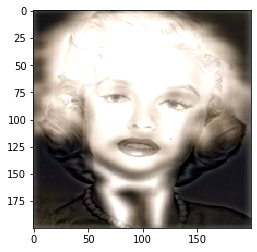

In [40]:
plt.imshow(out1)

In [0]:
image1 = cv2.imread("dog.bmp")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread("cat.bmp")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [0]:
out1, out2 = create_hybrid_image(image1, image2, (9,13),50)

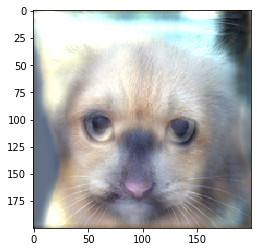

In [43]:
plt.imshow(out1)

In [0]:
image1 = cv2.imread("messi2.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread("lion.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [0]:
out1, out2 = create_hybrid_image(image1, image2, (13,13),3)

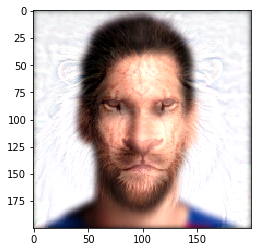

In [46]:
plt.imshow(out1)